#                                                 SLOVAKIA EDA

 The main purpose of Exploratory Data Analysis is to help look at the data before making any assumption, The Covid-19 pandemic is the most crucial health disaster that has surrounded the world for the past year. The following data helps us to understand the consequences of the COVID‐19 outbreak.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("linear-comprehensive-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [3]:
x = df.groupby(df.location)
Slovakia = x.get_group("Slovakia")

In [4]:
Slovakia

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
60393,SVK,Europe,Slovakia,2020-03-06,1.0,1.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60394,SVK,Europe,Slovakia,2020-03-07,1.0,0.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60395,SVK,Europe,Slovakia,2020-03-08,3.0,2.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60396,SVK,Europe,Slovakia,2020-03-09,3.0,0.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60397,SVK,Europe,Slovakia,2020-03-10,7.0,4.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60762,SVK,Europe,Slovakia,2021-03-10,329593.0,3600.0,2176.286,8146.0,109.0,93.857,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60763,SVK,Europe,Slovakia,2021-03-11,331571.0,1978.0,2058.857,8244.0,98.0,97.714,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60764,SVK,Europe,Slovakia,2021-03-12,333872.0,2301.0,2041.429,8346.0,102.0,97.286,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60765,SVK,Europe,Slovakia,2021-03-13,336235.0,2363.0,2018.714,8440.0,94.0,100.143,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86


# Percentage of missing values for each column

In [33]:
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

missing(df)


reproduction_rate                  19.34
hospital_beds_per_thousand         15.89
stringency_index                   14.44
total_deaths_per_million           14.38
new_deaths_per_million             14.17
total_deaths                       13.86
new_deaths                         13.65
aged_65_older                      10.25
aged_70_older                       9.72
median_age                          9.21
gdp_per_capita                      8.91
human_development_index             8.16
cardiovasc_death_rate               8.09
diabetes_prevalence                 6.91
population_density                  6.58
life_expectancy                     4.99
continent                           4.94
new_cases_smoothed_per_million      3.40
new_deaths_smoothed_per_million     3.40
new_deaths_smoothed                 2.87
new_cases_smoothed                  2.87
new_cases_per_million               2.07
total_cases_per_million             2.07
new_cases                           1.53
total_cases     

In [19]:
limitPer = len(df) * .80
df = df.dropna(thresh=limitPer, axis=1)

# We can also determine the null values in-terms of percentage

In [34]:
features_with_na=[features for features in Slovakia.columns if Slovakia[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(Slovakia[feature].isnull().mean(), 4),  ' % missing values')

new_cases_smoothed 0.0134  % missing values
total_deaths 0.0695  % missing values
new_deaths 0.0695  % missing values
new_deaths_smoothed 0.0134  % missing values
new_cases_smoothed_per_million 0.0134  % missing values
total_deaths_per_million 0.0695  % missing values
new_deaths_per_million 0.0695  % missing values
new_deaths_smoothed_per_million 0.0134  % missing values
reproduction_rate 0.0374  % missing values
stringency_index 0.0187  % missing values


In [36]:
Slovakia.isnull().sum()

iso_code                            0
continent                           0
location                            0
date                                0
total_cases                         0
new_cases                           0
new_cases_smoothed                  5
total_deaths                       26
new_deaths                         26
new_deaths_smoothed                 5
total_cases_per_million             0
new_cases_per_million               0
new_cases_smoothed_per_million      5
total_deaths_per_million           26
new_deaths_per_million             26
new_deaths_smoothed_per_million     5
reproduction_rate                  14
stringency_index                    7
population                          0
population_density                  0
median_age                          0
aged_65_older                       0
aged_70_older                       0
gdp_per_capita                      0
cardiovasc_death_rate               0
diabetes_prevalence                 0
hospital_bed

# We now find the null values present in the given series of object. Using the 'isnull().sum()' function, one can find the number of missing values per coumn.

In [35]:
Slovakia

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
60393,SVK,Europe,Slovakia,2020-03-06,1.0,1.0,NaN,NaN,NaN,NaN,...,113.128,41.2,15.07,9.167,30155.152,287.959,7.29,5.82,77.54,0.86
60394,SVK,Europe,Slovakia,2020-03-07,1.0,0.0,NaN,NaN,NaN,NaN,...,113.128,41.2,15.07,9.167,30155.152,287.959,7.29,5.82,77.54,0.86
60395,SVK,Europe,Slovakia,2020-03-08,3.0,2.0,NaN,NaN,NaN,NaN,...,113.128,41.2,15.07,9.167,30155.152,287.959,7.29,5.82,77.54,0.86
60396,SVK,Europe,Slovakia,2020-03-09,3.0,0.0,NaN,NaN,NaN,NaN,...,113.128,41.2,15.07,9.167,30155.152,287.959,7.29,5.82,77.54,0.86
60397,SVK,Europe,Slovakia,2020-03-10,7.0,4.0,NaN,NaN,NaN,NaN,...,113.128,41.2,15.07,9.167,30155.152,287.959,7.29,5.82,77.54,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60762,SVK,Europe,Slovakia,2021-03-10,329593.0,3600.0,2176.286,8146.0,109.0,93.857,...,113.128,41.2,15.07,9.167,30155.152,287.959,7.29,5.82,77.54,0.86
60763,SVK,Europe,Slovakia,2021-03-11,331571.0,1978.0,2058.857,8244.0,98.0,97.714,...,113.128,41.2,15.07,9.167,30155.152,287.959,7.29,5.82,77.54,0.86
60764,SVK,Europe,Slovakia,2021-03-12,333872.0,2301.0,2041.429,8346.0,102.0,97.286,...,113.128,41.2,15.07,9.167,30155.152,287.959,7.29,5.82,77.54,0.86
60765,SVK,Europe,Slovakia,2021-03-13,336235.0,2363.0,2018.714,8440.0,94.0,100.143,...,113.128,41.2,15.07,9.167,30155.152,287.959,7.29,5.82,77.54,0.86


In [38]:
print(Slovakia.shape)

(374, 29)


The Slovakia.shape tells that there are 374 rows and 29 columns in the DataFrame for the country Slovakia

# Using the heatmap, we can clearly locate the null values present in each column if any

Text(0.5, 1.0, 'Heatmap showing the null values present in dataframe-Slovakia_EDA')

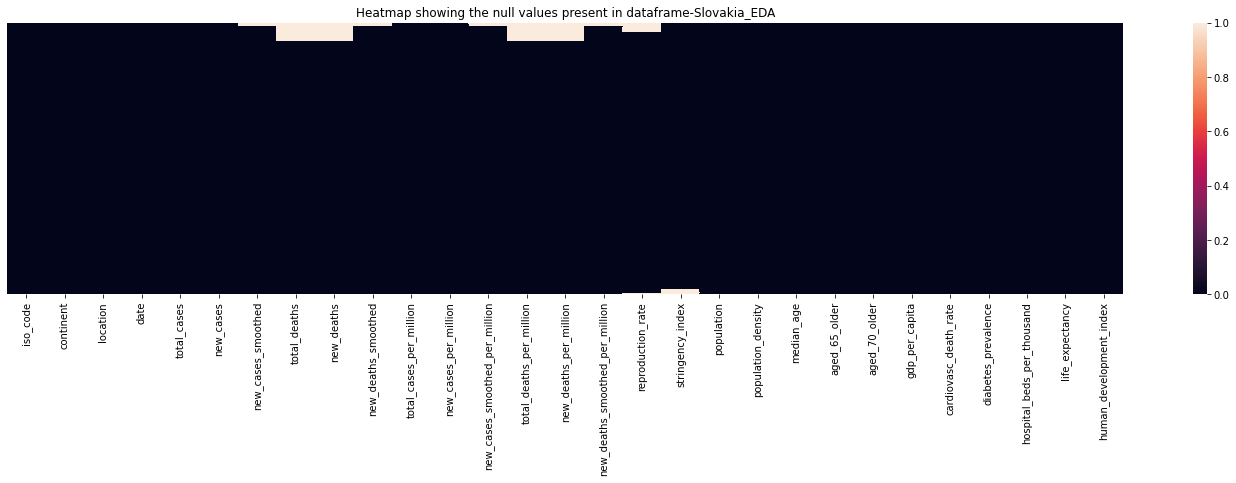

In [39]:
plt.figure(figsize=(25,5))
sns.heatmap(Slovakia.isnull(),yticklabels=False)
plt.title("Heatmap showing the null values present in dataframe-Slovakia_EDA")

# Columns having more than 80 percent missing values

In [23]:
def rmissingvaluecol(dff, threshold):
    l = []
    l = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index)) >= threshold))].columns, 1).columns.values)
    print("# Columns having more than %s percent missing values: "%threshold, (dff.shape[1] - len(l)))
    print("Columns:\n", list(set(list((dff.columns.values))) - set(l)))
    return l


rmissingvaluecol(df,80) # Here threshold is 80% which means we are going to drop columns having more than 80% of missing values


# Columns having more than 80 percent missing values:  0
Columns:
 []


['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index']

In [42]:
l = rmissingvaluecol(df, 80)
df1 = df[l]

# Columns having more than 80 percent missing values:  0
Columns:
 []


In [29]:
Slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         374 non-null    object 
 1   continent                        374 non-null    object 
 2   location                         374 non-null    object 
 3   date                             374 non-null    object 
 4   total_cases                      374 non-null    float64
 5   new_cases                        374 non-null    float64
 6   new_cases_smoothed               369 non-null    float64
 7   total_deaths                     348 non-null    float64
 8   new_deaths                       348 non-null    float64
 9   new_deaths_smoothed              369 non-null    float64
 10  total_cases_per_million          374 non-null    float64
 11  new_cases_per_million            374 non-null    float64
 12  new_cases_smooth

# Correlation Matrix of Slovakia_EDA

,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate
new_cases_smoothed,1.000000,0.652427,0.745103,0.804309,1.000000,0.745104,0.652427,0.804310,-0.198653
total_deaths,0.652427,1.000000,0.859386,0.940800,0.652427,0.859387,1.000000,0.940800,-0.270502
new_deaths,0.745103,0.859386,1.000000,0.918967,0.745103,1.000000,0.859386,0.918968,-0.281570
new_deaths_smoothed,0.804309,0.940800,0.918967,1.000000,0.804309,0.918968,0.940800,1.000000,-0.314211
new_cases_smoothed_per_million,1.000000,0.652427,0.745103,0.804309,1.000000,0.745104,0.652427,0.804310,-0.198653
new_deaths_per_million,0.745104,0.859387,1.000000,0.918968,0.745104,1.000000,0.859387,0.918969,-0.281570
total_deaths_per_million,0.652427,1.000000,0.859386,0.940800,0.652427,0.859387,1.000000,0.940800,-0.270502
new_deaths_smoothed_per_million,0.804310,0.940800,0.918968,1.000000,0.804310,0.918969,0.940800,1.000000,-0.314207
reproduction_rate,-0.198653,-0.270502,-0.281570,-0.314211,-0.198653,-0.281570,-0.270502,-0.314207,1.000000


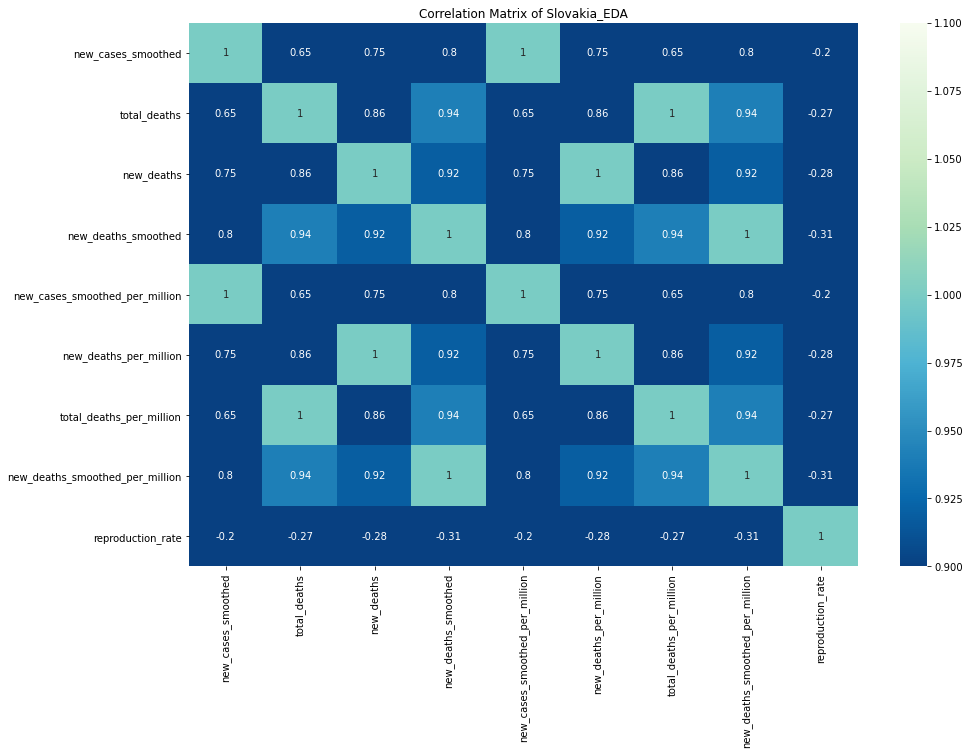

In [17]:
Slovakia_corr = Slovakia[['new_cases_smoothed','total_deaths','new_deaths','new_deaths_smoothed','new_cases_smoothed_per_million',
                           'new_deaths_per_million','total_deaths_per_million','new_deaths_smoothed_per_million','reproduction_rate']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(Slovakia_corr,annot = True,vmin =1,vmax=1,cmap ='GnBu_r')
plt.title("Correlation Matrix of Slovakia_EDA")
Slovakia_corr

In [31]:
Slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 60393 to 60766
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         374 non-null    object 
 1   continent                        374 non-null    object 
 2   location                         374 non-null    object 
 3   date                             374 non-null    object 
 4   total_cases                      374 non-null    float64
 5   new_cases                        374 non-null    float64
 6   new_cases_smoothed               369 non-null    float64
 7   total_deaths                     348 non-null    float64
 8   new_deaths                       348 non-null    float64
 9   new_deaths_smoothed              369 non-null    float64
 10  total_cases_per_million          374 non-null    float64
 11  new_cases_per_million            374 non-null    float64
 12  new_cases_smooth

# After removing the missing values, the shape of the dataset has been changed to (374, 29) from (374, 59)